In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 2.5983 - accuracy: 0.5323 - val_loss: 1.7134 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.4010 - accuracy: 0.7045 - val_loss: 1.3034 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 1.0483 - accuracy: 0.7769 - val_loss: 1.1408 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8262 - accuracy: 0.8216 - val_loss: 1.0529 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6665 - accuracy: 0.8567 - val_loss: 0.9913 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5331 - accuracy: 0.8846 - val_loss: 0.9314 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.4275 - accuracy: 0.9083 - val_loss: 0.9107 - val_accuracy: 0.8040
Epoch 8/20
16

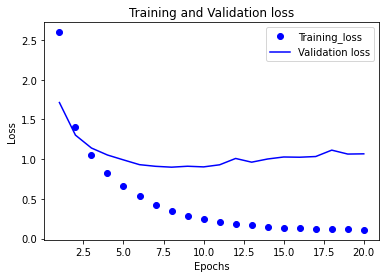

In [11]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

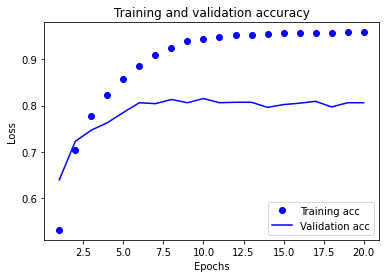

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 2.6420 - accuracy: 0.5347 - val_loss: 1.7532 - val_accuracy: 0.6500
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4339 - accuracy: 0.7071 - val_loss: 1.3426 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0644 - accuracy: 0.7775 - val_loss: 1.1648 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8436 - accuracy: 0.8232 - val_loss: 1.0535 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6733 - accuracy: 0.8583 - val_loss: 1.0039 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5354 - accuracy: 0.8895 - val_loss: 0.9536 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 37ms/step - loss: 0.4370 - accuracy: 0.9084 - val_loss: 0.8961 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [15]:
results

[0.9854196906089783, 0.7880676984786987]

In [16]:
predictions = model.predict(x_test)

In [20]:
np.argmax(predictions[0])

3